# Step 1: Load Data

In [47]:
# file = open('Royal_data.txt', 'r')
# royal_data = file.readlines()
# print(royal_data)
# file.close()

In [48]:
import requests

url = 'https://raw.githubusercontent.com/01745134/proyectos-ingenieria/main/actividad3/Royal_data.txt'  # replace with your URL
response = requests.get(url)
royal_data = response.text.splitlines()

print(royal_data)

['The future king is the prince', 'Daughter is the princess', 'Son is the prince', 'Only a man can be a king', 'Only a woman can be a queen', 'The princess will be a queen', 'The prince is a strong man', 'The princess is a beautiful woman', 'Prince is only a boy now', 'Prince will be king', 'A boy will be a man']


Removing '\n' from the end of every sentence and convert the sentence into lowercase

In [49]:
for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n', '')

print(royal_data)             

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


Removing stop words

In [50]:
# In natural language processing (NLP), stopwords are words that are filtered out before or after processing text. 
# They are usually the most common words in a language and include words like 'the', 'is', 'at', 'which', and 'on'.
stopwords = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

# Initialize an empty list to store the filtered data
filtered_data = []

# Loop over each sentence in the royal_data
for sent in royal_data:
    # Initialize a list to store the words in the current sentence
    temp = []
    
    # Split the sentence into words and loop over each word
    for word in sent.split():
        # If the word is not in the list of stopwords
        if word not in stopwords:
            # Append the word to the temporary list
            temp.append(word)
    
    # Append the temp list to the filtered data
    filtered_data.append(temp)

# Print the filtered data
print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


# Step 2: Create Biagrams

Creating bigrams

In [51]:
# Initialize an empty list to store the bigrams
bigrams = []

# Loop over each list of words in the filtered_data
for words_list in filtered_data:
    # Loop over each word in the current list, except the last one
    for i in range(len(words_list) - 1):
        # Loop over each word in the current list, starting from the next word
        for j in range(i+1, len(words_list)):
            # Append the pair of words (bigram) in both orders to the bigrams list
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])

# Print the list of bigrams
print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


Vocabulary

In [52]:
# Initialize an empty list to store all words
all_words = []

# Loop over each sentence in the filtered_data
for sent in filtered_data:
    # Extend the all_words list with the words in the current sentence
    all_words.extend(sent)

# Remove duplicates from the all_words list by converting it to a set and then back to a list
all_words = list(set(all_words))
all_words.sort() # Sort the list of all words in alphabetical order

print(all_words) # Print the list of all words
print(len(all_words)) # Print the total number of unique words

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
12


# Step 3: One-hot encoding

In [53]:
import numpy as np

In [54]:
words_dict = {}

counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


In [55]:
# Initialize a 2D numpy array of zeros with shape (len(all_words), len(all_words))
onehot_data = np.zeros((len(all_words), len(all_words)))

# Loop over each index in the range of the length of all_words
for i in range(len(all_words)):
    # Set the i-th element of the i-th row to 1, creating a one-hot encoded matrix
    onehot_data[i][i] = 1

# Initialize an empty dictionary to store the one-hot encodings
onehot_dict = {}

# Loop over each index in the range of the length of all_words
for i in range(len(all_words)):
    # Map each word in all_words to its corresponding one-hot encoding in onehot_data
    onehot_dict[all_words[i]] = onehot_data[i]
    
# Loop over each word in the onehot_dict
for word in onehot_dict:
    # Print the word and its corresponding one-hot encoding
    print(word, onehot_dict[word])

beautiful [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [56]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]]) # First word of the bigram
    Y.append(onehot_dict[bi[1]]) # Second word of the bigram
    
X = np.array(X)
Y = np.array(Y)

# Step 4: Create Model and Train

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [58]:
model = Sequential()

vocal_size = len(onehot_data[0])
embed_size = 2

model.add(Input(shape=(vocal_size,)))
model.add(Dense(embed_size, activation='linear'))
model.add(Dense(vocal_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [59]:
model.fit(X, Y, epochs = 1000)

Epoch 1/1000


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5438
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5380 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5350 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5352 
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5342 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5314 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5333 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5278 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5319 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5273 
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5299 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5252 
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5285 
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5245 
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5238 
Epoch 16/1000
2/2 

# Step 5: Visualize results

In [60]:
weights = model.get_weights()[0]

word_embeddings = {}
for word in all_words:
    word_embeddings[word] = weights[words_dict[word]]

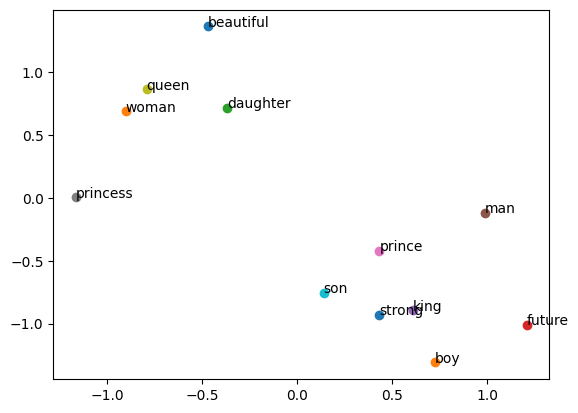

In [61]:
import matplotlib.pyplot as plt

# plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.savefig('img.jpg')